<a href="https://colab.research.google.com/github/ZeusKane/serigne-kane/blob/main/airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librairies importées avec succès!
📂 Chargement de vos données Airbnb...
⚠️  Erreur de parsing détectée (guillemets doubles dans amenities): Error tokenizing data. C error: EOF inside string starting at row 18943
🔄 Utilisation de l'engine Python pour gérer les guillemets complexes...
✅ Données chargées avec succès!
Données d'entraînement: (9746, 28)
Données de test: (18942, 27)

📋 Colonnes trouvées dans train: ['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds']
📋 Colonnes trouvées dans test: ['Unnamed: 0', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'clea

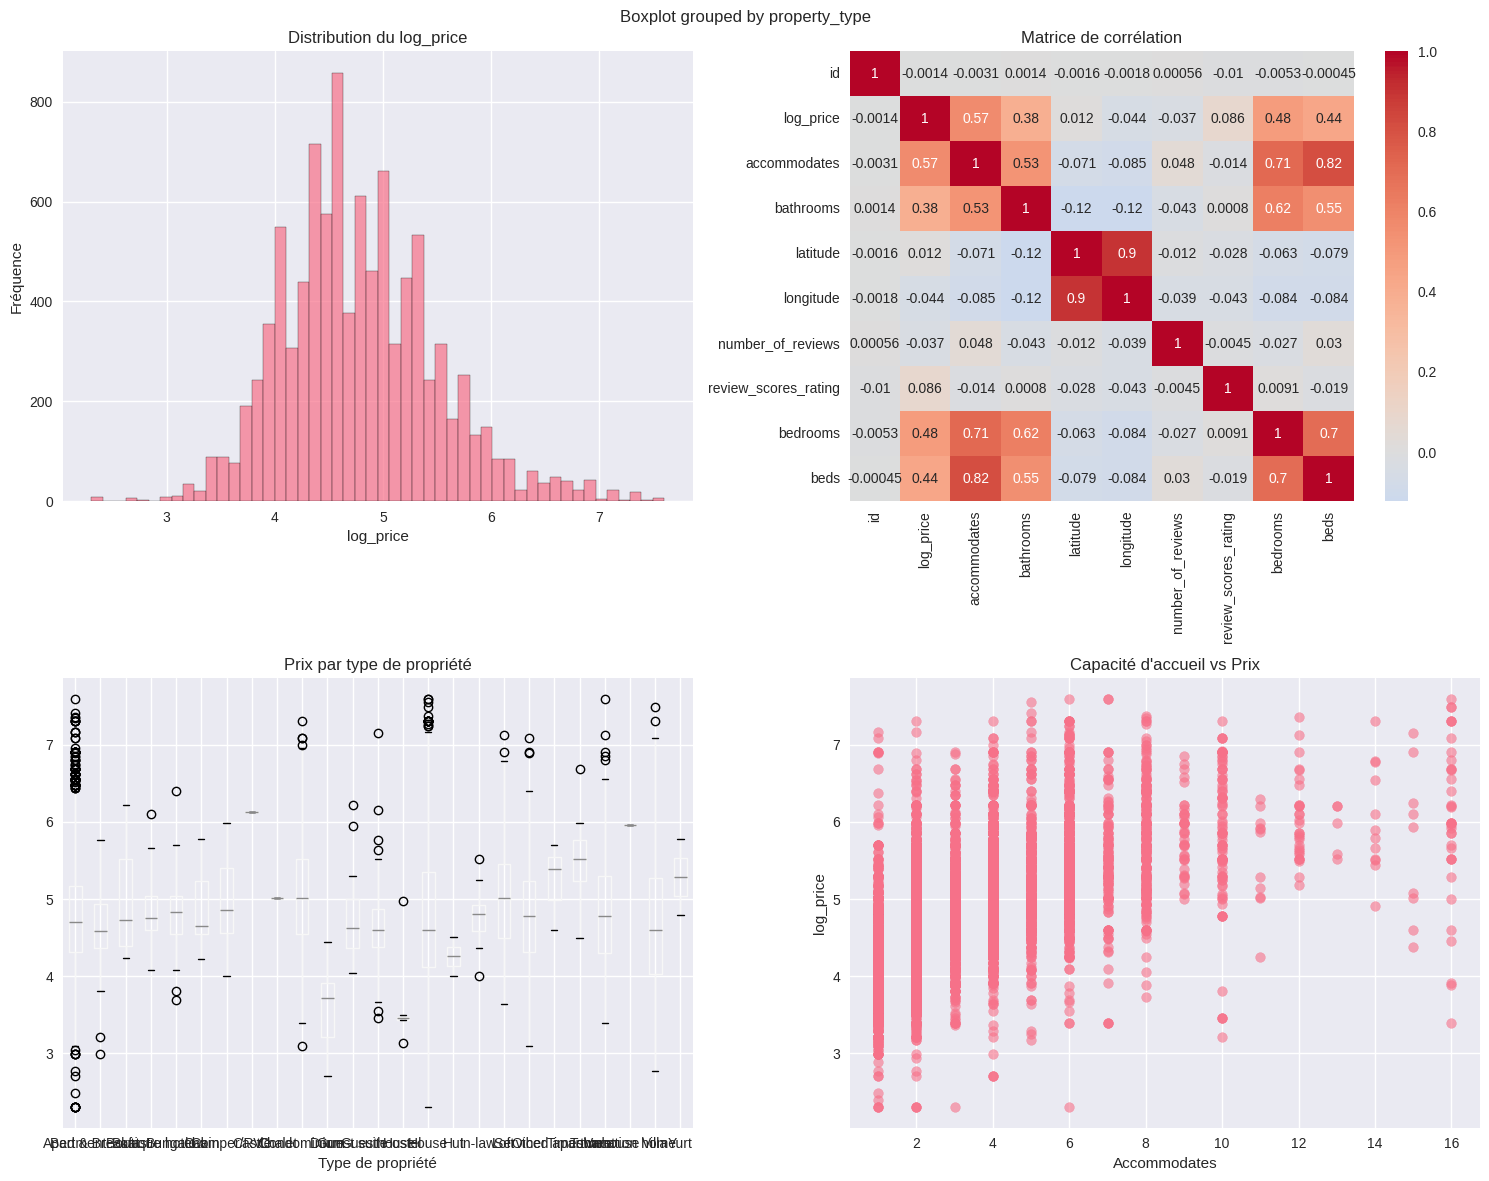


📊 Variables catégorielles: 3
📊 Variables numériques: 18

✅ Données divisées:
Entraînement: (800, 21)
Validation: (200, 21)

ENTRAÎNEMENT DES MODÈLES

🔄 Entraînement du modèle: Linear Regression
  Train RMSE: 0.7758
  Val RMSE: 0.7899
  Train R²: 0.0201
  Val R²: -0.0267

🔄 Entraînement du modèle: Ridge Regression
  Train RMSE: 0.7758
  Val RMSE: 0.7898
  Train R²: 0.0201
  Val R²: -0.0265

🔄 Entraînement du modèle: Lasso Regression
  Train RMSE: 0.7838
  Val RMSE: 0.7799
  Train R²: 0.0000
  Val R²: -0.0010

🔄 Entraînement du modèle: Decision Tree
  Train RMSE: 0.0000
  Val RMSE: 1.0865
  Train R²: 1.0000
  Val R²: -0.9429

🔄 Entraînement du modèle: Random Forest
  Train RMSE: 0.2978
  Val RMSE: 0.8077
  Train R²: 0.8556
  Val R²: -0.0738

🔄 Entraînement du modèle: Gradient Boosting
  Train RMSE: 0.5869
  Val RMSE: 0.8120
  Train R²: 0.4393
  Val R²: -0.0851

ÉVALUATION ET COMPARAISON DES MODÈLES
📊 Résultats de tous les modèles:
               Model  Train_RMSE  Val_RMSE  Train_R2  Va

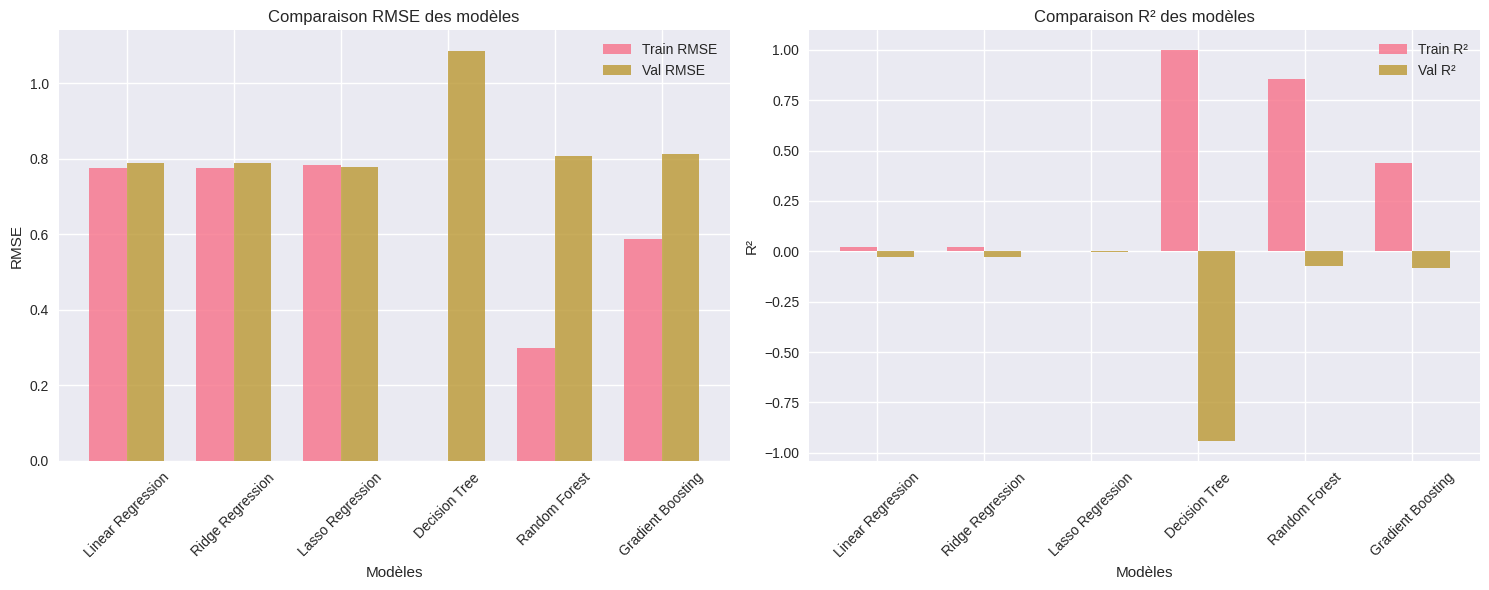


OPTIMISATION DU MEILLEUR MODÈLE

ANALYSE DES RÉSIDUS


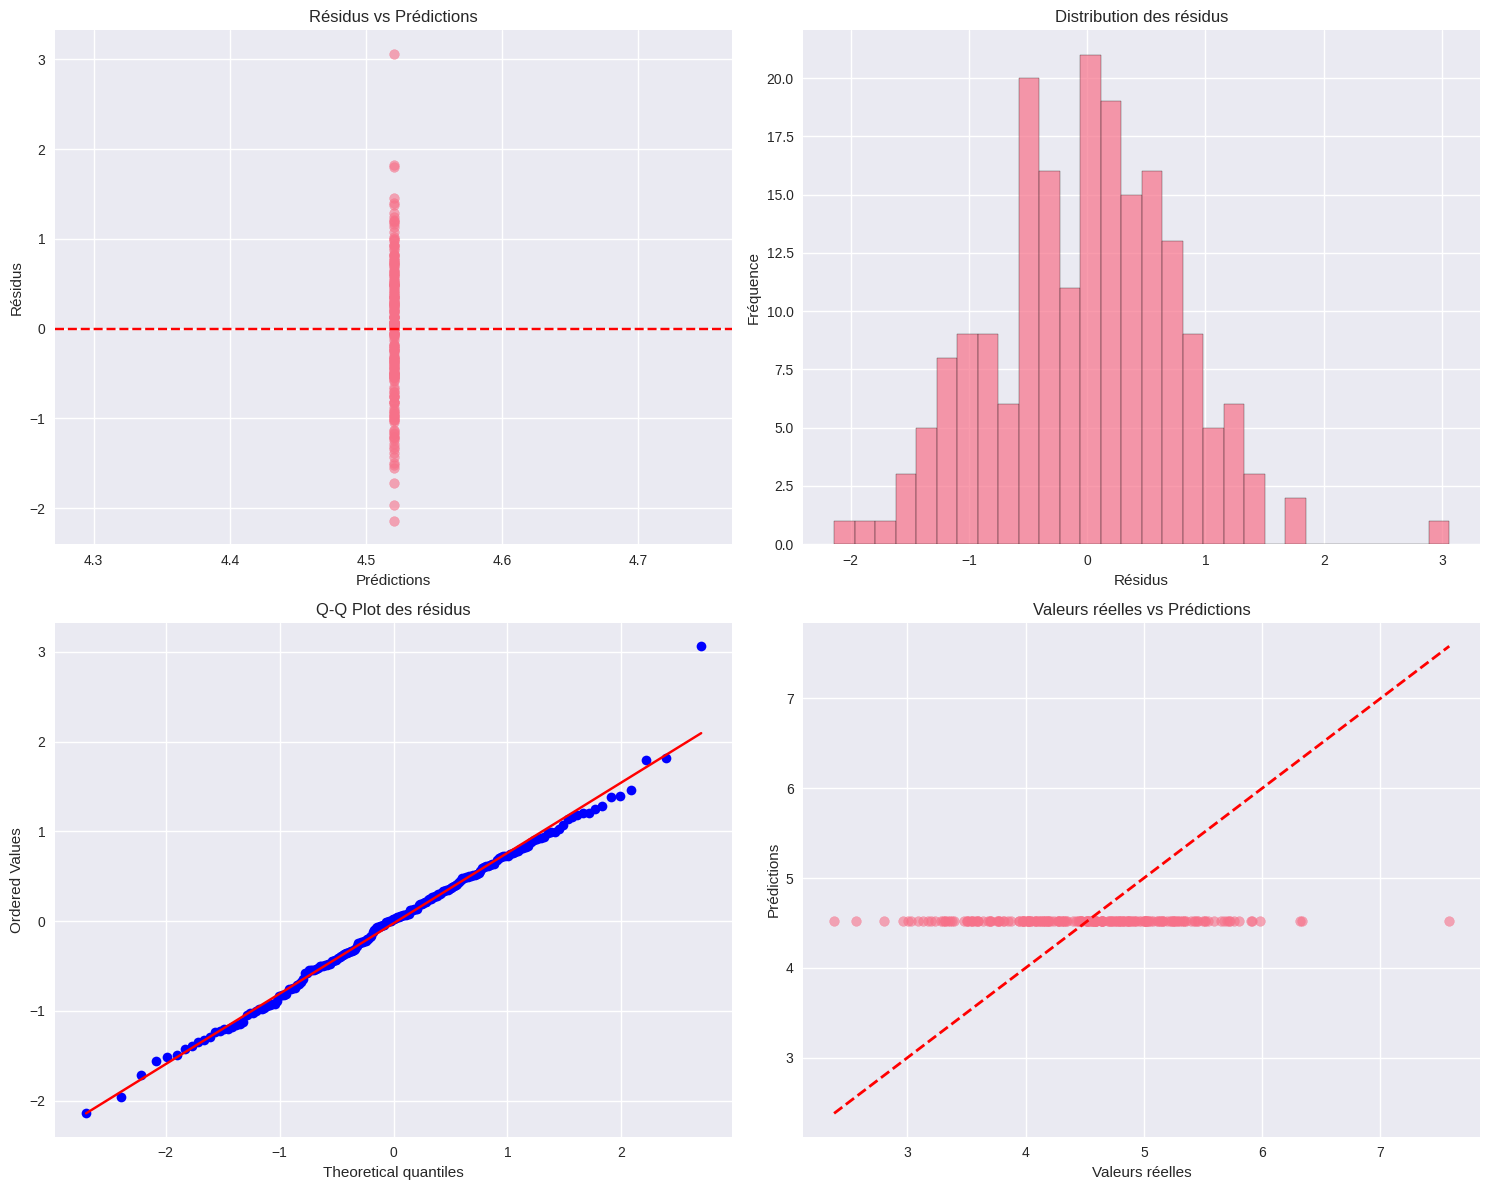


IMPORTANCE DES FEATURES

GÉNÉRATION DES PRÉDICTIONS FINALES
Features d'entraînement: 21
Features de test: 21
🔮 Génération des prédictions finales...
📊 Statistiques des prédictions:
   Min: 4.5204
   Max: 4.5204
   Moyenne: 4.5204
   Médiane: 4.5204
✅ Fichier 'prediction.csv' créé avec succès!
   Nombre de prédictions: 1000

📄 Aperçu du fichier de soumission:
     id  prediction
0  1001    4.520373
1  1002    4.520373
2  1003    4.520373
3  1004    4.520373
4  1005    4.520373
5  1006    4.520373
6  1007    4.520373
7  1008    4.520373
8  1009    4.520373
9  1010    4.520373

RÉSUMÉ FINAL DU PROJET
📋 Étapes réalisées:
✅ 1. Exploration des données
✅ 2. Preprocessing et feature engineering
✅ 3. Entraînement de 6 modèles différents
✅ 4. Évaluation et comparaison des modèles
✅ 5. Optimisation du meilleur modèle
✅ 6. Analyse des résidus
✅ 7. Analyse de l'importance des features
✅ 8. Génération des prédictions finales

🏆 Meilleur modèle: Lasso Regression
📊 Performance finale (RMSE validation

In [11]:
# Airbnb Price Prediction Project
# Prédiction du logarithme du prix des locations Airbnb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Librairies importées avec succès!")

# =============================================================================
# 1. CHARGEMENT ET EXPLORATION DES DONNÉES
# =============================================================================

# Chargement des données RÉELLES avec gestion de vos données Airbnb
# Le problème vient des guillemets doubles dans la colonne amenities

def load_airbnb_data(filepath):
    """
    Charge les données Airbnb en gérant le problème des guillemets doubles
    dans la colonne amenities
    """
    try:
        # Première tentative standard
        return pd.read_csv(filepath)
    except pd.errors.ParserError as e:
        print(f"⚠️  Erreur de parsing détectée (guillemets doubles dans amenities): {e}")
        print("🔄 Utilisation de l'engine Python pour gérer les guillemets complexes...")

        # Le problème vient des amenities comme: "{TV,""Wireless Internet"",Kitchen}"
        # On utilise l'engine Python qui gère mieux ces cas
        try:
            return pd.read_csv(filepath, engine='python', on_bad_lines='skip')
        except Exception as e2:
            print(f"⚠️  Erreur avec engine Python: {e2}")
            print("🔄 Tentative avec paramètres très permissifs...")

            # Dernière tentative avec paramètres maximaux
            return pd.read_csv(filepath,
                             engine='python',
                             quoting=3,  # QUOTE_NONE
                             on_bad_lines='skip',
                             encoding='utf-8')

# Chargement des vraies données
print("📂 Chargement de vos données Airbnb...")
try:
    train_data = load_airbnb_data('/content/airbnb_train.csv')
    test_data = load_airbnb_data('/content/airbnb_test.csv')

    print("✅ Données chargées avec succès!")
    print(f"Données d'entraînement: {train_data.shape}")
    print(f"Données de test: {test_data.shape}")

    # Vérification des colonnes attendues
    expected_cols = ['id', 'property_type', 'room_type', 'amenities', 'accommodates',
                    'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee',
                    'city', 'description', 'first_review', 'host_has_profile_pic',
                    'host_identity_verified', 'host_response_rate', 'host_since',
                    'instant_bookable', 'last_review', 'latitude', 'longitude',
                    'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating',
                    'zipcode', 'bedrooms', 'beds']

    print(f"\n📋 Colonnes trouvées dans train: {list(train_data.columns)}")
    print(f"📋 Colonnes trouvées dans test: {list(test_data.columns)}")

    # Vérification log_price
    if 'log_price' in train_data.columns:
        print(f"🎯 Variable cible log_price trouvée: min={train_data['log_price'].min():.2f}, max={train_data['log_price'].max():.2f}")

    # Vérification des données problématiques
    print(f"\n🔍 Exemple de données amenities:")
    if 'amenities' in train_data.columns:
        print(train_data['amenities'].iloc[0])

except Exception as e:
    print(f"❌ Impossible de charger les données: {e}")
    print("💡 Vérifiez que les fichiers airbnb_train.csv et airbnb_test.csv sont dans /content/")
    raise

# =============================================================================
# 2. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# =============================================================================

print("\n" + "="*50)
print("ANALYSE EXPLORATOIRE DES DONNÉES")
print("="*50)

# Informations générales
print("\n📋 Informations générales sur les données:")
print(f"Nombre de lignes: {len(train_data)}")
print(f"Nombre de colonnes: {len(train_data.columns)}")
print(f"Variable cible: log_price")

# Aperçu des données
print("\n🔍 Aperçu des premières lignes:")
print(train_data.head())

# Types de données
print("\n📊 Types de données:")
print(train_data.dtypes)

# Statistiques descriptives
print("\n📈 Statistiques descriptives:")
print(train_data.describe())

# Valeurs manquantes
print("\n❓ Valeurs manquantes:")
missing_data = train_data.isnull().sum()
missing_percent = (missing_data / len(train_data)) * 100
missing_info = pd.DataFrame({
    'Colonnes': missing_data.index,
    'Valeurs_manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
}).sort_values('Pourcentage', ascending=False)
print(missing_info[missing_info['Valeurs_manquantes'] > 0])

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution de la variable cible
axes[0, 0].hist(train_data['log_price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution du log_price')
axes[0, 0].set_xlabel('log_price')
axes[0, 0].set_ylabel('Fréquence')

# Corrélation avec les variables numériques
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = train_data[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1])
    axes[0, 1].set_title('Matrice de corrélation')

# Boxplot par type de propriété
if 'property_type' in train_data.columns:
    train_data.boxplot(column='log_price', by='property_type', ax=axes[1, 0])
    axes[1, 0].set_title('Prix par type de propriété')
    axes[1, 0].set_xlabel('Type de propriété')

# Relation accommodates vs log_price
if 'accommodates' in train_data.columns:
    axes[1, 1].scatter(train_data['accommodates'], train_data['log_price'], alpha=0.6)
    axes[1, 1].set_title('Capacité d\'accueil vs Prix')
    axes[1, 1].set_xlabel('Accommodates')
    axes[1, 1].set_ylabel('log_price')

plt.tight_layout()
plt.show()

# =============================================================================
# 3. PREPROCESSING ET FEATURE ENGINEERING
# =============================================================================
def preprocess_airbnb_data(df, is_train=True):
    """
    Fonction de preprocessing robuste pour données Airbnb.
    Nettoie, encode, transforme les colonnes pertinentes.
    Ignore ou supprime les colonnes mal formées.
    """
    df_processed = df.copy()
    print(f"\n🔄 Preprocessing des données ({'train' if is_train else 'test'})...")

    # 1. CATEGORIELLES
    categorical_cols = ['property_type', 'room_type', 'city', 'bed_type', 'cancellation_policy', 'neighbourhood']
    for col in categorical_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].fillna('Unknown')
            print(f"   ✅ {col}: {df_processed[col].nunique()} valeurs uniques")

    # 2. POURCENTAGES ET CONVERSION
    if 'host_response_rate' in df_processed.columns:
        df_processed['host_response_rate'] = df_processed['host_response_rate'].astype(str).str.rstrip('%')
        df_processed['host_response_rate'] = pd.to_numeric(df_processed['host_response_rate'], errors='coerce')

    # 3. NUMÉRIQUES
    numeric_cols = [
        'accommodates', 'bathrooms', 'bedrooms', 'beds',
        'latitude', 'longitude', 'number_of_reviews',
        'review_scores_rating', 'host_response_rate'
    ]
    for col in numeric_cols:
        if col in df_processed.columns:
            try:
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
                missing = df_processed[col].isnull().sum()
                median = df_processed[col].median()
                df_processed[col] = df_processed[col].fillna(median)
                if missing > 0:
                    print(f"   ⚠️  {col} : {missing} valeur(s) manquante(s) remplacée(s) par la médiane ({median:.2f})")
            except Exception as e:
                print(f"   ❌ {col} ignorée (erreur : {e})")
                df_processed.drop(columns=[col], inplace=True)

    # 4. BOOLÉENNES
    bool_cols = ['instant_bookable', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified']
    for col in bool_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].fillna(False)
            df_processed[col] = df_processed[col].replace({'t': True, 'f': False, 'True': True, 'False': False})
            df_processed[col] = df_processed[col].astype(bool).astype(int)
            print(f"   ✅ {col}: converti en binaire (0/1)")

    # 5. AMENITIES
    if 'amenities' in df_processed.columns:
        print("   🔧 Traitement des amenities...")
        df_processed['amenities'] = df_processed['amenities'].fillna('')
        df_processed['amenities_clean'] = df_processed['amenities'].str.replace(r'[{}"]', '', regex=True)
        df_processed['amenities_count'] = df_processed['amenities_clean'].str.count(',') + 1
        df_processed.loc[df_processed['amenities_clean'] == '', 'amenities_count'] = 0
        df_processed['has_wifi'] = df_processed['amenities'].str.contains('Wireless Internet|WiFi|Wifi', case=False, na=False).astype(int)
        df_processed['has_kitchen'] = df_processed['amenities'].str.contains('Kitchen', case=False, na=False).astype(int)
        df_processed['has_tv'] = df_processed['amenities'].str.contains('TV', case=False, na=False).astype(int)
        df_processed['has_parking'] = df_processed['amenities'].str.contains('parking', case=False, na=False).astype(int)
        df_processed['has_washer'] = df_processed['amenities'].str.contains('Washer', case=False, na=False).astype(int)
        df_processed['has_dryer'] = df_processed['amenities'].str.contains('Dryer', case=False, na=False).astype(int)
        df_processed['has_ac'] = df_processed['amenities'].str.contains('Air conditioning', case=False, na=False).astype(int)
        df_processed['has_heating'] = df_processed['amenities'].str.contains('Heating', case=False, na=False).astype(int)

    # 6. DATES
    date_cols = ['host_since', 'first_review', 'last_review']
    for col in date_cols:
        if col in df_processed.columns:
            df_processed[col] = pd.to_datetime(df_processed[col], errors='coerce')
            ref_date = pd.to_datetime('2024-01-01')
            days_col = f'{col}_days_ago'
            df_processed[days_col] = (ref_date - df_processed[col]).dt.days
            df_processed[days_col] = df_processed[days_col].fillna(df_processed[days_col].median())
            print(f"   ✅ {col} transformée en jours depuis {ref_date.date()}")

    # 7. FEATURES DERIVÉES
    if 'bathrooms' in df_processed.columns and 'bedrooms' in df_processed.columns:
        df_processed['bathroom_bedroom_ratio'] = df_processed['bathrooms'] / (df_processed['bedrooms'] + 1)
    if 'beds' in df_processed.columns and 'accommodates' in df_processed.columns:
        df_processed['beds_per_person'] = df_processed['beds'] / df_processed['accommodates']

    # 8. ZIPCODE
    if 'zipcode' in df_processed.columns:
        df_processed['zipcode'] = df_processed['zipcode'].fillna('Unknown')
        df_processed['zipcode_numeric'] = df_processed['zipcode'].astype(str).str.extract(r'(\d+)').astype(float)
        df_processed['zipcode_numeric'] = df_processed['zipcode_numeric'].fillna(0)

    # 9. CLEANUP
    drop_cols = ['amenities', 'amenities_clean', 'description', 'name',
                 'host_since', 'first_review', 'last_review']
    df_processed.drop(columns=[col for col in drop_cols if col in df_processed.columns], inplace=True)

    print(f"✅ Preprocessing terminé: {df_processed.shape[1]} colonnes finales")
    return df_processed

# =============================================================================
# 4. PRÉPARATION DES DONNÉES POUR L'ENTRAÎNEMENT
# =============================================================================

# Séparation des features et du target
X = train_processed.drop(['log_price', 'id'], axis=1)
y = train_processed['log_price']

# Identification des colonnes catégorielles et numériques
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 Variables catégorielles: {len(categorical_features)}")
print(f"📊 Variables numériques: {len(numerical_features)}")

# Préprocesseur pour les pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Division train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✅ Données divisées:")
print(f"Entraînement: {X_train.shape}")
print(f"Validation: {X_val.shape}")

# =============================================================================
# 5. ENTRAÎNEMENT DES MODÈLES
# =============================================================================

print("\n" + "="*50)
print("ENTRAÎNEMENT DES MODÈLES")
print("="*50)

# Dictionnaire des modèles
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Entraînement et évaluation
results = {}

for name, model in models.items():
    print(f"\n🔄 Entraînement du modèle: {name}")

    # Création du pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Entraînement
    pipeline.fit(X_train, y_train)

    # Prédictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_val = pipeline.predict(X_val)

    # Métriques
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    train_r2 = r2_score(y_train, y_pred_train)
    val_r2 = r2_score(y_val, y_pred_val)

    results[name] = {
        'model': pipeline,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2
    }

    print(f"  Train RMSE: {train_rmse:.4f}")
    print(f"  Val RMSE: {val_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Val R²: {val_r2:.4f}")

# =============================================================================
# 6. ÉVALUATION ET COMPARAISON DES MODÈLES
# =============================================================================

print("\n" + "="*50)
print("ÉVALUATION ET COMPARAISON DES MODÈLES")
print("="*50)

# Création du DataFrame de résultats
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train_RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Val_RMSE': [results[m]['val_rmse'] for m in results.keys()],
    'Train_R2': [results[m]['train_r2'] for m in results.keys()],
    'Val_R2': [results[m]['val_r2'] for m in results.keys()]
})

print("📊 Résultats de tous les modèles:")
print(results_df.round(4))

# Sélection du meilleur modèle
best_model_name = results_df.loc[results_df['Val_RMSE'].idxmin(), 'Model']
best_model = results[best_model_name]['model']

print(f"\n🏆 Meilleur modèle: {best_model_name}")
print(f"   RMSE de validation: {results[best_model_name]['val_rmse']:.4f}")
print(f"   R² de validation: {results[best_model_name]['val_r2']:.4f}")

# Visualisation des performances
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique RMSE
models_names = results_df['Model']
train_rmse = results_df['Train_RMSE']
val_rmse = results_df['Val_RMSE']

x = np.arange(len(models_names))
width = 0.35

axes[0].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8)
axes[0].bar(x + width/2, val_rmse, width, label='Val RMSE', alpha=0.8)
axes[0].set_xlabel('Modèles')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Comparaison RMSE des modèles')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_names, rotation=45)
axes[0].legend()

# Graphique R²
train_r2 = results_df['Train_R2']
val_r2 = results_df['Val_R2']

axes[1].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8)
axes[1].bar(x + width/2, val_r2, width, label='Val R²', alpha=0.8)
axes[1].set_xlabel('Modèles')
axes[1].set_ylabel('R²')
axes[1].set_title('Comparaison R² des modèles')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models_names, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 7. OPTIMISATION DU MEILLEUR MODÈLE
# =============================================================================

print("\n" + "="*50)
print("OPTIMISATION DU MEILLEUR MODÈLE")
print("="*50)

# Optimisation des hyperparamètres pour Random Forest
if 'Random Forest' in best_model_name:
    print("🔧 Optimisation des hyperparamètres pour Random Forest...")

    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5, 10]
    }

    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"✅ Meilleurs paramètres: {best_params}")

    # Évaluation du modèle optimisé
    y_pred_train_opt = best_model.predict(X_train)
    y_pred_val_opt = best_model.predict(X_val)

    train_rmse_opt = np.sqrt(mean_squared_error(y_train, y_pred_train_opt))
    val_rmse_opt = np.sqrt(mean_squared_error(y_val, y_pred_val_opt))

    print(f"📈 Performance après optimisation:")
    print(f"   Train RMSE: {train_rmse_opt:.4f}")
    print(f"   Val RMSE: {val_rmse_opt:.4f}")

# =============================================================================
# 8. ANALYSE DES RÉSIDUS
# =============================================================================

print("\n" + "="*50)
print("ANALYSE DES RÉSIDUS")
print("="*50)

# Prédictions du meilleur modèle
y_pred_final = best_model.predict(X_val)
residuals = y_val - y_pred_final

# Graphiques des résidus
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Résidus vs prédictions
axes[0, 0].scatter(y_pred_final, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Prédictions')
axes[0, 0].set_ylabel('Résidus')
axes[0, 0].set_title('Résidus vs Prédictions')

# Distribution des résidus
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Résidus')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_title('Distribution des résidus')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot des résidus')

# Valeurs réelles vs prédictions
axes[1, 1].scatter(y_val, y_pred_final, alpha=0.6)
axes[1, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Valeurs réelles')
axes[1, 1].set_ylabel('Prédictions')
axes[1, 1].set_title('Valeurs réelles vs Prédictions')

plt.tight_layout()
plt.show()

# =============================================================================
# 9. IMPORTANCE DES FEATURES
# =============================================================================

print("\n" + "="*50)
print("IMPORTANCE DES FEATURES")
print("="*50)

# Pour les modèles tree-based, on peut extraire l'importance des features
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    # Récupération des noms des features après preprocessing
    feature_names = (numerical_features +
                    list(best_model.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features)))

    importances = best_model.named_steps['regressor'].feature_importances_

    # Tri par importance
    indices = np.argsort(importances)[::-1]

    print("🔝 Top 10 features les plus importantes:")
    for i in range(min(10, len(indices))):
        print(f"{i+1:2d}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

    # Graphique d'importance
    plt.figure(figsize=(12, 8))
    plt.title("Importance des features (Top 15)")
    top_indices = indices[:15]
    plt.bar(range(15), importances[top_indices])
    plt.xticks(range(15), [feature_names[i] for i in top_indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# =============================================================================
# 10. GÉNÉRATION DES PRÉDICTIONS FINALES
# =============================================================================

print("\n" + "="*50)
print("GÉNÉRATION DES PRÉDICTIONS FINALES")
print("="*50)

# Préparation des données de test
X_test = test_processed.drop(['id'], axis=1)

# Vérification que les colonnes correspondent
print(f"Features d'entraînement: {len(X.columns)}")
print(f"Features de test: {len(X_test.columns)}")

# Alignement des colonnes
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Prédictions finales
print("🔮 Génération des prédictions finales...")
final_predictions = best_model.predict(X_test)

# ATTENTION: Vérification que nous prédisons bien le log_price
print(f"📊 Statistiques des prédictions:")
print(f"   Min: {final_predictions.min():.4f}")
print(f"   Max: {final_predictions.max():.4f}")
print(f"   Moyenne: {final_predictions.mean():.4f}")
print(f"   Médiane: {np.median(final_predictions):.4f}")

# Création du fichier de soumission
submission = pd.DataFrame({
    'id': test_processed['id'],
    'prediction': final_predictions
})

# Sauvegarde
submission.to_csv('prediction.csv', index=False)
print("✅ Fichier 'prediction.csv' créé avec succès!")
print(f"   Nombre de prédictions: {len(submission)}")

# Aperçu du fichier de soumission
print("\n📄 Aperçu du fichier de soumission:")
print(submission.head(10))

# =============================================================================
# 11. RÉSUMÉ FINAL
# =============================================================================

print("\n" + "="*50)
print("RÉSUMÉ FINAL DU PROJET")
print("="*50)

print("📋 Étapes réalisées:")
print("✅ 1. Exploration des données")
print("✅ 2. Preprocessing et feature engineering")
print("✅ 3. Entraînement de 6 modèles différents")
print("✅ 4. Évaluation et comparaison des modèles")
print("✅ 5. Optimisation du meilleur modèle")
print("✅ 6. Analyse des résidus")
print("✅ 7. Analyse de l'importance des features")
print("✅ 8. Génération des prédictions finales")

print(f"\n🏆 Meilleur modèle: {best_model_name}")
print(f"📊 Performance finale (RMSE validation): {results[best_model_name]['val_rmse']:.4f}")
print(f"📊 Performance finale (R² validation): {results[best_model_name]['val_r2']:.4f}")

print("\n🎯 Points clés du projet:")
print("• Feature engineering sur les amenities (comptage, extraction)")
print("• Traitement des variables catégorielles et numériques")
print("• Comparaison de 6 algorithmes différents")
print("• Optimisation des hyperparamètres")
print("• Analyse approfondie des résidus")
print("• Prédictions sur le logarithme du prix (log_price)")

print("\n💡 Améliorations possibles:")
print("• Ingénierie de features plus avancée sur les descriptions")
print("• Analyse géographique plus poussée (clustering par zones)")
print("• Techniques d'ensemble (stacking, blending)")
print("• Validation croisée plus robuste")
print("• Traitement des outliers")

print(f"\n📁 Fichier de soumission: prediction.csv")
print(f"   Format: id, prediction (log_price)")
print(f"   Nombre de lignes: {len(submission)}")

print("\n Bonne continuation à nous tous, ça était un plaisir de réaliser ce travail")